In [1]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *


data=geopandas.read_file('final/complete_KKA.geojson')
data_pop=geopandas.read_file('final/gkz_pop.gpkg')


In [27]:
gkz_pop=pd.merge(data,data_pop, on='GKZ')
gkz_pop.rename(columns={'geometry_x':'geometry'},inplace=True)
gkz_pop.set_geometry('geometry')
#get values relative to POP
gkz_pop['%PEonpop']=gkz_pop.sum_PE/gkz_pop.Pop*100
gkz_pop['%nonitriPEonpop']=gkz_pop.PE_nonitri/gkz_pop.Pop*100
#gkz_pop.to_file('final/gkz_pop+KKA.gpkg', driver='GPKG')


In [2]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')

<AxesSubplot:title={'center':'Number of persons served by small WWTPs by municipality (design size)'}>

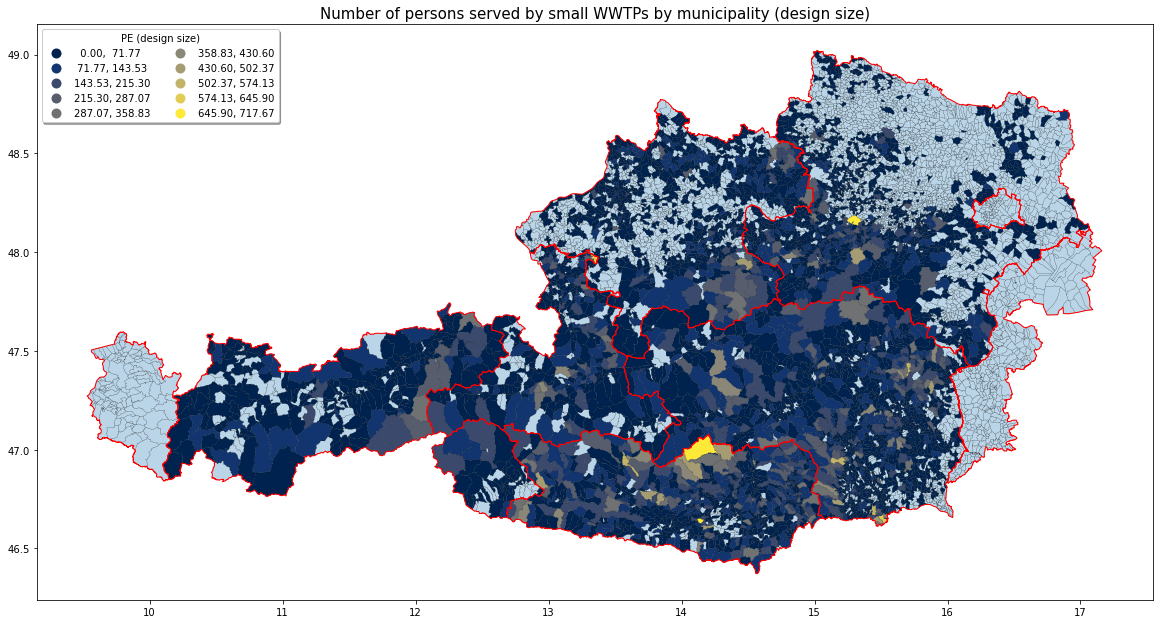

In [3]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Number of persons served by small WWTPs by municipality (design size)', fontsize=15)
data.plot(column='sum_PE',cmap='cividis', ax=ax, legend=True, scheme='EqualInterval', k=10,                          # EqualInterval is good
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': 'PE (design size)'})                            # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

In [4]:
#percentage of non-nitriin total
data.PE_nonitri.sum()/data.sum_PE.sum()*100



17.798616550416316

<AxesSubplot:title={'center':'Percentage of non-nitrIfying small WWTPs by municipality'}>

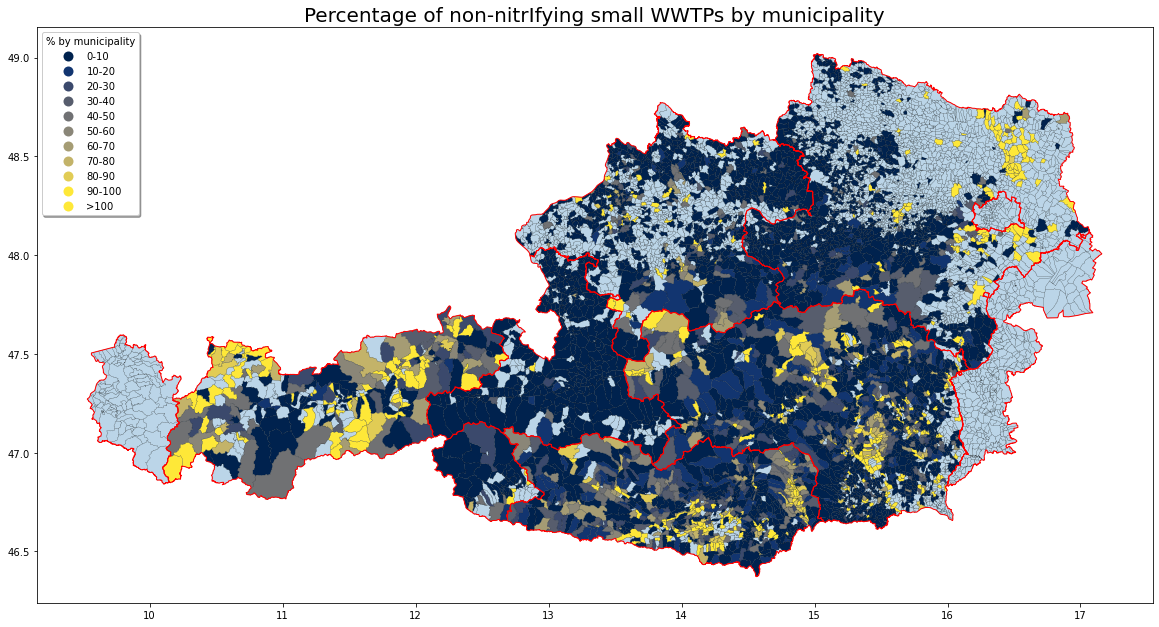

In [5]:
#plot for old infrastructure density. 
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='%before_reg', ax=ax,legend=True,scheme='user_defined',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},cmap='cividis', k=10, legend_kwds={'loc':'upper left', 'shadow':'True','title':'% by municipality'})
ax.set_title('Percentage of non-nitrIfying small WWTPs by municipality', fontsize=20)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

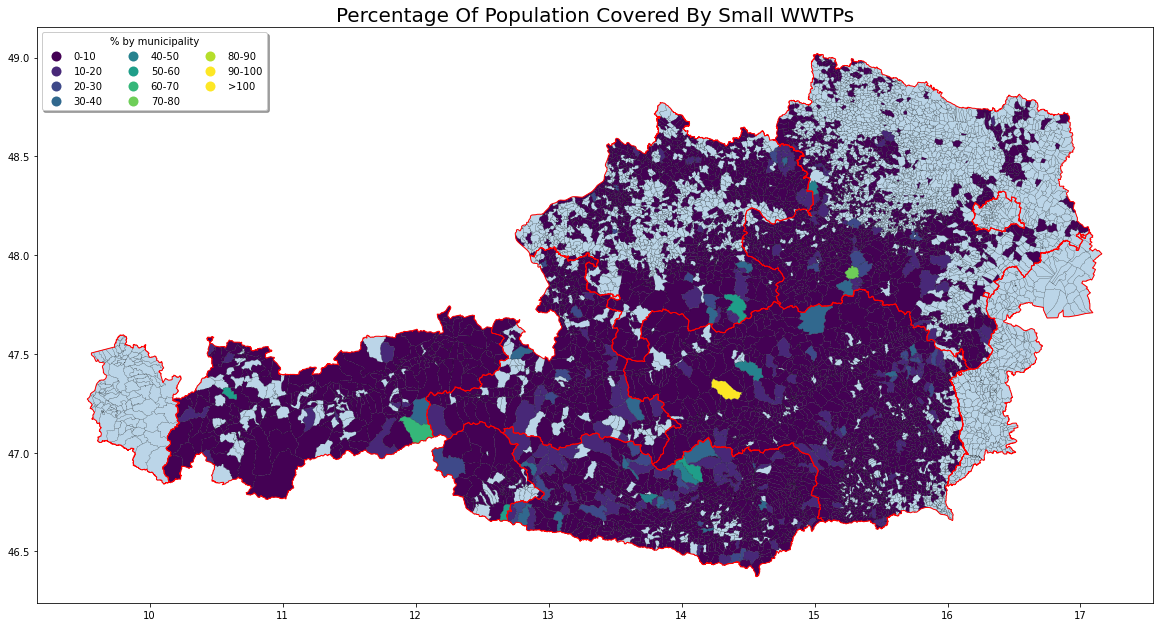

In [29]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
gkz_pop.plot(column='%PEonpop', ax=ax,legend=True,scheme='user_defined',cmap='viridis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},legend_kwds={'loc':'upper left','ncol':3, 'shadow':'True','title':'% by municipality'})
plt.title('percentage of population covered by small'.title()+' WWTPs', fontsize=20)

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)


leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


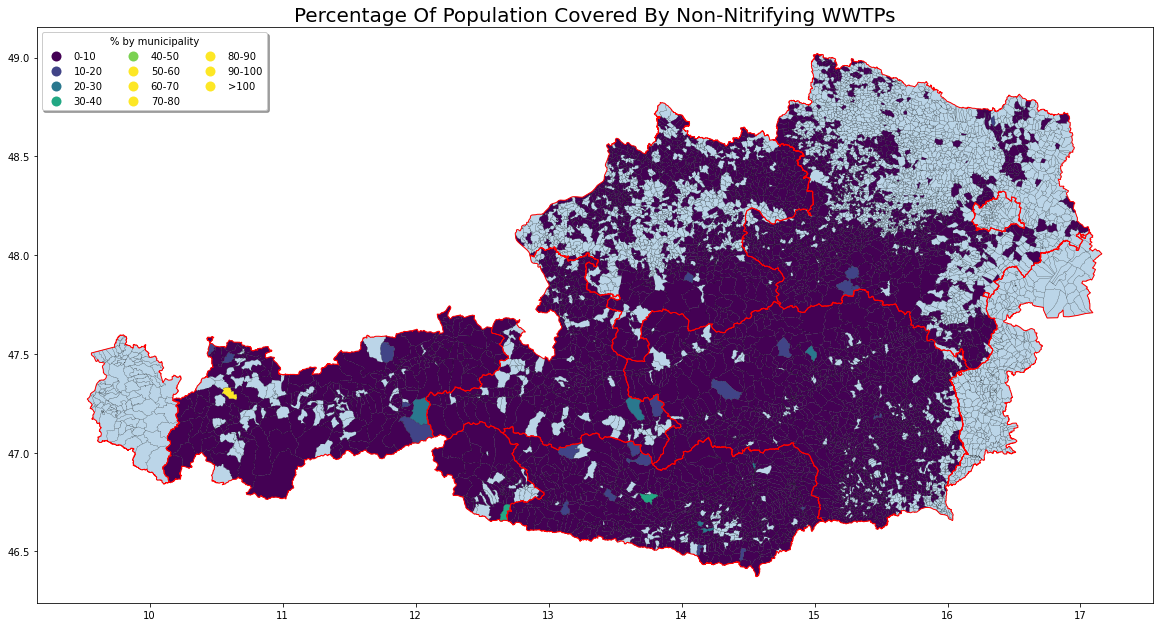

In [30]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
gkz_pop.plot(column='%nonitriPEonpop', ax=ax,legend=True,scheme='user_defined',cmap='viridis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]}, legend_kwds={'ncol':3, 'loc':'upper left', 'shadow':'True','title':'% by municipality'})
ax.set_title('percentage of population covered by non-nitrifying'.title()+' WWTPs', fontsize=20)

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)

In [32]:
data.PE_nonitri.sum()

43714.8